# BUILDING A FLOWER Classification Model 

In [157]:
#Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf # using tf version==1.14.0
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [4]:
#Images Path
train_path='D:/flowers/train'

In [46]:
#Starting with the Base Architecture(Lenet Architecture)

model_lenet = Sequential(name='flower_lenet')
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model_lenet.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model_lenet.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model_lenet.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model_lenet.add(Flatten())
model_lenet.add(Dense(120, activation='relu'))

model_lenet.add(Dropout(0.3))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model_lenet.add(Dense(84, activation='relu'))

model_lenet.add(Dropout(0.3))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model_lenet.add(Dense(5, activation='softmax'))

model_lenet.summary()

Model: "flower_lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 16)        400       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 120)               69240     
_________________________________________________________________
dropout_5 (Dropout)          (None, 120)              

In [52]:
from keras.callbacks import History
valid_path='D:/flowers/valid'
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


training_set=train_datagen.flow_from_directory(train_path,target_size=(32,32),batch_size=8,class_mode='categorical')

testing_set=test_datagen.flow_from_directory(valid_path,target_size=(32,32),batch_size=8,class_mode='categorical')

model_lenet.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model_lenet.fit_generator(training_set,steps_per_epoch=500,epochs=15,validation_data=testing_set,validation_steps=100)

model_lenet.save('model_lenet.h5')

Found 3471 images belonging to 5 classes.
Found 845 images belonging to 5 classes.
Epoch 1/15
500/500 [==============================] - 16s 31ms/step - loss: 0.1784 - accuracy: 0.9395 - val_loss: 1.5469 - val_accuracy: 0.5550
Epoch 2/15
500/500 [==============================] - 15s 31ms/step - loss: 0.1232 - accuracy: 0.9555 - val_loss: 6.9202 - val_accuracy: 0.5408
Epoch 3/15
500/500 [==============================] - 16s 32ms/step - loss: 0.1659 - accuracy: 0.9400 - val_loss: 1.5291 - val_accuracy: 0.5646
Epoch 4/15
500/500 [==============================] - 17s 34ms/step - loss: 0.1607 - accuracy: 0.9492 - val_loss: 3.4289 - val_accuracy: 0.5320
Epoch 5/15
500/500 [==============================] - 20s 41ms/step - loss: 0.1583 - accuracy: 0.9448 - val_loss: 3.3307 - val_accuracy: 0.5320
Epoch 6/15
500/500 [==============================] - 18s 37ms/step - loss: 0.1408 - accuracy: 0.9480 - val_loss: 4.1208 - val_accuracy: 0.5571
Epoch 7/15
500/500 [==============================] -

In [53]:
# Checking the metrics of the model
import pandas as pd
metrics=pd.DataFrame(history.history)
metrics.head()

,val_loss,val_accuracy,loss,accuracy
0,1.546877,0.555000,0.178406,0.939470
1,6.920176,0.540778,0.123186,0.955500
2,1.529120,0.564617,0.165892,0.939970
3,3.428911,0.531995,0.160764,0.949237
4,3.330735,0.531995,0.158285,0.944750


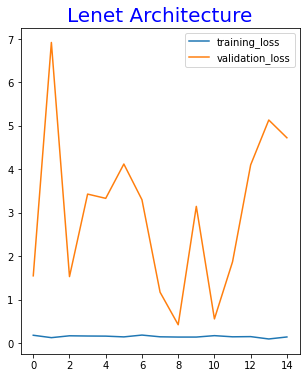

In [178]:
#Visualizing the training loss and validation loss
plt_1=plt.subplots(figsize=(5,6))
plt.title('Lenet Architecture',fontdict={'color':'blue','fontsize':20})
sns.lineplot(np.arange(15),history.history['loss'],label='training_loss')
sns.lineplot(np.arange(15),history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

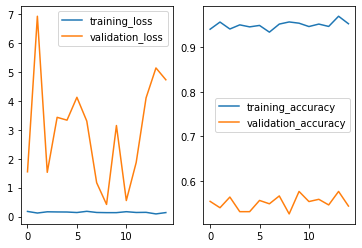

In [179]:
# Visualizing the metrics of Lenet Architecture
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(15),history.history['loss'],label='training_loss')
ax1.plot(np.arange(15),history.history['val_loss'],label='validation_loss')
ax2.plot(np.arange(15),history.history['accuracy'],label='training_accuracy')
ax2.plot(np.arange(15),history.history['val_accuracy'],label='validation_accuracy')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

In [159]:
from keras.models import load_model
test_image=image.load_img('C:/Users/Asif/OneDrive/Desktop/tulip-white-prince.jpg',target_size=(32,32))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
model=load_model('model_lenet.h5')
results=model.predict(test_image)

if results[0][0]==1:
    prediction='daisy'
    print('The prediction class is {}'.format(prediction))
elif results[0][1]==1:
    prediction='dandelion'
    print('The prediction class is {}'.format(prediction))
elif results[0][2]==1:
    prediction='rose'
    print('The prediction class is {}'.format(prediction))
elif results[0][3]==1:
    prediction='sunflower'
    print('The prediction class is {}'.format(prediction))
elif results[0][4]==1:
    prediction='tulip'
    print('The prediction class is {}'.format(prediction))
else:
    prediction='unknown'
    print('The prediction class is {}'.format(prediction))

The prediction class is tulip


In [121]:
#tulip - tulip correct prediction(1)
#dandelion- sunflower wrong prediction(0)
#sunflower - sunflower - correct prediction(1)
#daisy - daisy - correct prediction(1)
#dog - tulip -wrong prediction (0)
#rose - rose - correct prediction(1)

#drawbacks - not able to predict other images

In [122]:
#Correct Prediction(Classified Correctly)
4/6

0.6666666666666666

In [123]:
#InCorrect Predictions(Classified InCorrectly)
2/6

0.3333333333333333

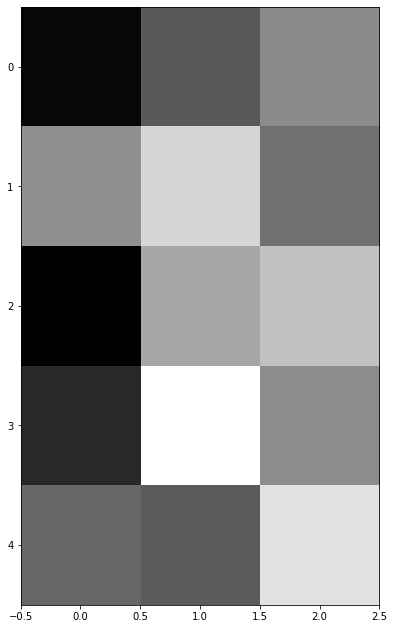

In [177]:
#Visualizing the first conv layers
fig,ax=plt.subplots(figsize=(12,11))
arr=np.load('conv1dlenet.npy')
plt.imshow(arr[0,:,:,1],cmap='gray',aspect='equal')
plt.show()

In [161]:
#Now moving on to AlexNet Architecture
from keras.callbacks import History
model_alexnet = Sequential()

# 1st Convolutional Layer
model_alexnet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid',activation='relu'))

# Pooling 
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_alexnet.add(BatchNormalization())

# 2nd Convolutional Layer
model_alexnet.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid',activation='relu'))
# Pooling
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# 3rd Convolutional Layer
model_alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# 4th Convolutional Layer
model_alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# 5th Convolutional Layer
model_alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'))
# Pooling
model_alexnet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# Passing it to a dense layer
model_alexnet.add(Flatten())
# 1st Dense Layer
model_alexnet.add(Dense(2048, input_shape=(224*224*3,),activation='relu'))
# Add Dropout to prevent overfitting
model_alexnet.add(Dropout(0.4))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# 2nd Dense Layer
model_alexnet.add(Dense(2048,activation='relu'))
# Add Dropout
model_alexnet.add(Dropout(0.4))
# Batch Normalisation
model_alexnet.add(BatchNormalization())

# 3rd Dense Layer
#model.add(Dense(1000))
#model.add(Activation('relu'))
# Add Dropout
#model.add(Dropout(0.4))
# Batch Normalisation
#model.add(BatchNormalization())

# Output Layer
model_alexnet.add(Dense(5,activation='softmax'))

model_alexnet.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 6, 6, 384)       

In [144]:
model_alexnet.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

training_set_alexnet=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=8,class_mode='categorical')

testing_set_alexnet=test_datagen.flow_from_directory(valid_path,target_size=(224,224),batch_size=8,class_mode='categorical')


history_alexnet=model_alexnet.fit_generator(training_set_alexnet,steps_per_epoch=50,epochs=10,validation_data=testing_set_alexnet,validation_steps=10)

model_alexnet.save('model_alexnet.h5')

Found 3471 images belonging to 5 classes.
Found 845 images belonging to 5 classes.
Epoch 1/10
50/50 [==============================] - 69s 1s/step - loss: 2.1103 - accuracy: 0.2600 - val_loss: 2.5748 - val_accuracy: 0.2750
Epoch 2/10
50/50 [==============================] - 57s 1s/step - loss: 2.0208 - accuracy: 0.2125 - val_loss: 3.2243 - val_accuracy: 0.3000
Epoch 3/10
50/50 [==============================] - 56s 1s/step - loss: 2.0295 - accuracy: 0.2650 - val_loss: 1.8980 - val_accuracy: 0.1625
Epoch 4/10
50/50 [==============================] - 64s 1s/step - loss: 2.0598 - accuracy: 0.2180 - val_loss: 1.8884 - val_accuracy: 0.1500
Epoch 5/10
50/50 [==============================] - 63s 1s/step - loss: 1.8608 - accuracy: 0.2850 - val_loss: 2.4283 - val_accuracy: 0.2875
Epoch 6/10
50/50 [==============================] - 57s 1s/step - loss: 1.8680 - accuracy: 0.3525 - val_loss: 2.4997 - val_accuracy: 0.2750
Epoch 7/10
50/50 [==============================] - 57s 1s/step - loss: 1.757

In [148]:
metrics_alexnet=pd.DataFrame(history_alexnet.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,1.546877,0.555000,0.178406,0.939470
1,6.920176,0.540778,0.123186,0.955500
2,1.529120,0.564617,0.165892,0.939970
3,3.428911,0.531995,0.160764,0.949237
4,3.330735,0.531995,0.158285,0.944750
5,4.120792,0.557089,0.140771,0.947974
6,3.298672,0.549561,0.182518,0.932966
7,1.169541,0.567127,0.142637,0.950988
8,0.420531,0.526976,0.136693,0.955750
9,3.145749,0.577164,0.136676,0.952976


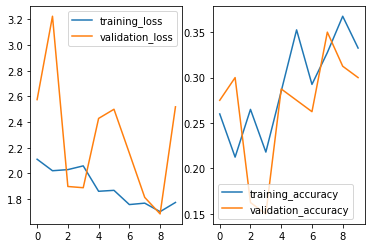

In [149]:
#Visualizing the training loss and validation loss
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(np.arange(10),history_alexnet.history['loss'],label='training_loss')
ax1.plot(np.arange(10),history_alexnet.history['val_loss'],label='validation_loss')
ax2.plot(np.arange(10),history_alexnet.history['accuracy'],label='training_accuracy')
ax2.plot(np.arange(10),history_alexnet.history['val_accuracy'],label='validation_accuracy')
ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()